# The Sparks Foundation

## #GRIPJUN21

### TASK-1 : Prediction using supervised ML

### Submited by - Bhumika Nim

### Predict percentage marks obtained by a student from the number of hours he/she studied.

In [1]:
# Importing relevant libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Importing data

url = 'http://bit.ly/w-data'
data = pd.read_csv(url)

# View data
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Description
1. Hours - Number of hours student study for, per day.
2. Score - Percentage marks obtained by a student.

### Visual repersentation of data

Text(0, 0.5, 'Percentage score')

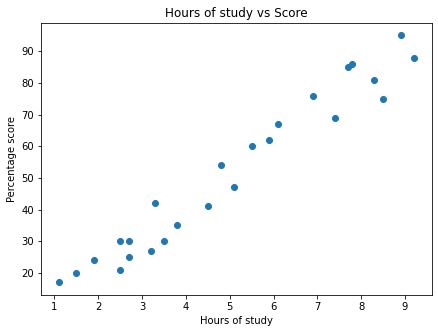

In [3]:
# Visualize data imported

plt.figure(figsize = (7,5))
plt.scatter(data['Hours'], data['Scores'])
plt.title('Hours of study vs Score')
plt.xlabel('Hours of study')
plt.ylabel('Percentage score')

Analysis : The data appears to be linearly distributed.

### Train-Test split

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
# Splitting data

X_train, X_test, y_train, y_test = train_test_split( data[['Hours']], data['Scores'], test_size = 0.2, random_state = 34)

### Fit the data to Linear regression model

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
# Defining an object of linear regression model

lreg = LinearRegression()

In [8]:
# Fitting the object to our training data

lreg.fit(X_train, y_train)

LinearRegression()

### Predicting results using model

In [9]:
# Predicting new results using test data

pred = lreg.predict(X_test)

In [10]:
predictions = pd.DataFrame(pred, columns = ['Predicted scores'])

predictions

,Predicted scores
0,20.991924
1,87.875985
2,77.365633
3,73.543686
4,55.389441


### Testing Model accuracy

In [11]:
from sklearn import metrics

In [12]:
# Checking accuracy of our model using predicted results and actual results

MAE = metrics.mean_absolute_error(y_test, pred)
MSE = metrics.mean_squared_error(y_test, pred)
RMSE = np.sqrt(MSE)

print('Mean absolute error is {}'.format(MAE))
print('Mean squared error is {}'.format(MSE))
print('Root mean squared error is {}'.format(RMSE))

Mean absolute error is 5.584140593037943
Mean squared error is 35.25094907911947
Root mean squared error is 5.937250969861344


### Model Visualisation

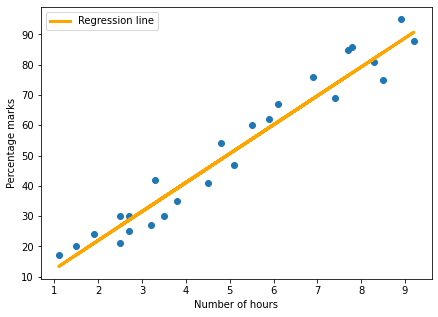

In [13]:
plt.figure(figsize = (7,5))
plt.scatter(data['Hours'], data['Scores'])

# Visualising the linear model obtained

yhat = lreg.coef_*X_train + lreg.intercept_
fig = plt.plot(X_train, yhat, lw=3, c='orange', label ='Regression line')
plt.xlabel('Number of hours')
plt.ylabel('Percentage marks')
plt.legend()

### Predicting Results

In [14]:
# Function to get scores given the number of study hours
# Corrected for values 
# No value greater than 100% (marks) or 24hrs (hours)


def get_results(hrs):
    if hrs > 24:
        print('Invalid entry : Only 24 hrs in a day!!!')
    else:
        scr = lreg.predict([[hrs]]) # Reshaping the entered value as a 2d array
        if scr > 100:
            print('Your expected score is '+str(100) + '%')
        else:
            print('Your expected score is '+str(scr[0].round(2))+'%')

In [20]:
print('Enter the number of hours you study..')
hrs = float(input())  # Converting input string value to float value

get_results(hrs)

Enter the number of hours you study..
9.5
Your expected score is 93.61%


## Thank you.